In [3]:
import matplotlib.pyplot as plt
import os
import cv2
# from retinaface import RetinaFace
import dlib
from tensorflow import keras
import numpy as np
import time
import math

In [4]:
img_folder = '2. Detection_img'

# images

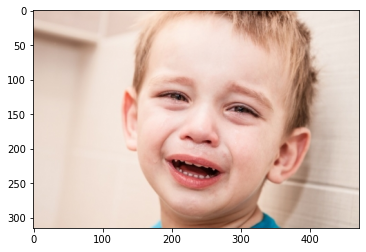

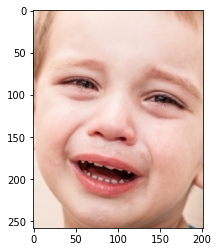

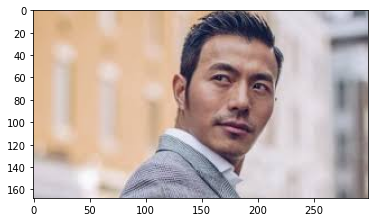

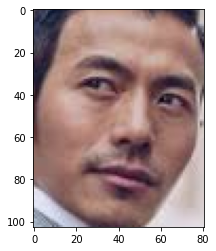

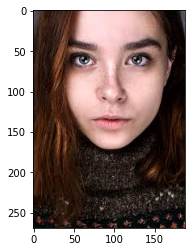

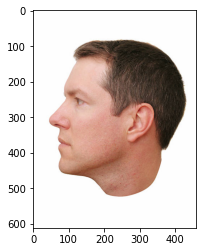

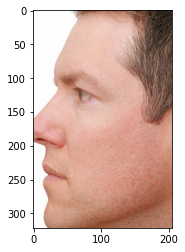

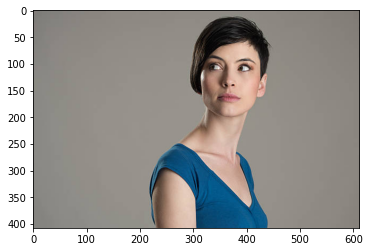

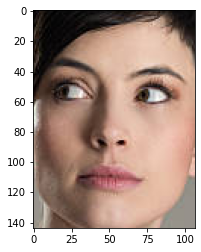

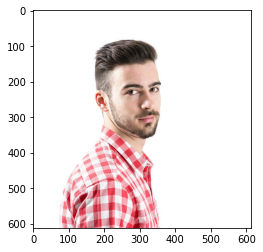

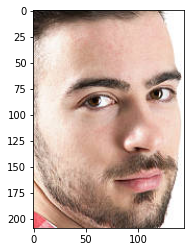

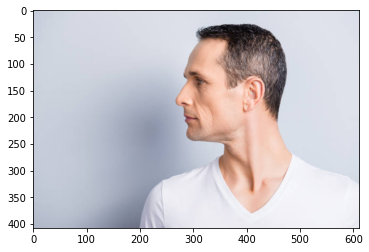

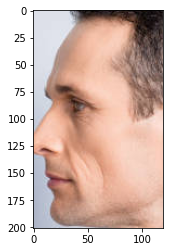

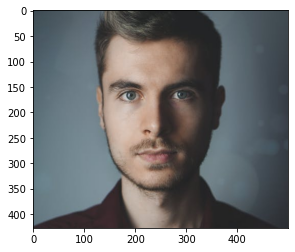

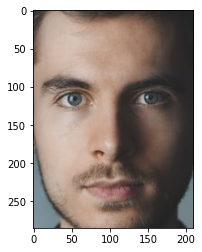

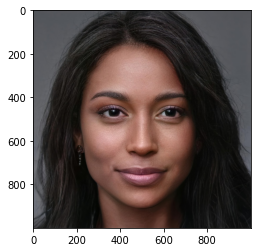

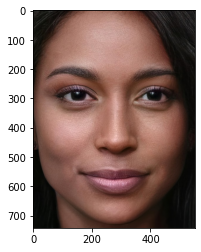

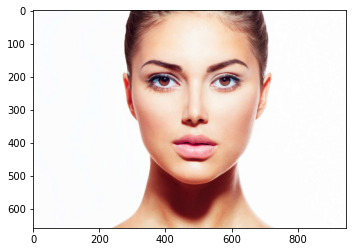

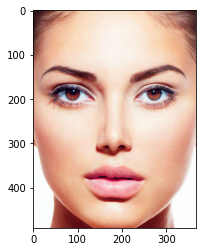

6.1846355676651


In [5]:
# retineface: slow but good
# 6 seconds
total = 0
for filename in os.listdir(img_folder):
    start = time.time()
    path = os.path.join(img_folder, filename)
#     path2 = os.path.join(os.path.join('test_detected', 'retina'), filename)
    img = cv2.imread(path,1)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()
    
    faces = RetinaFace.extract_faces(img_path = path, align = False)
    try:
        for face in faces:
#             bgr = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
            plt.imshow(face)
#             cv2.imwrite(path2,bgr)# imwrite works in bgr
            plt.show()
    except cv2.error as e:
        print('[Unknown error] Invalid face!')
        
    end = time.time()
    total = total + (end-start)
#     print('Used time:',end-start)
print(total/10)

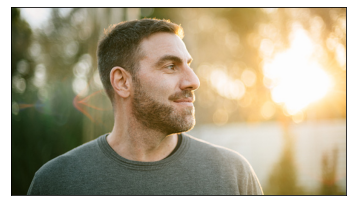

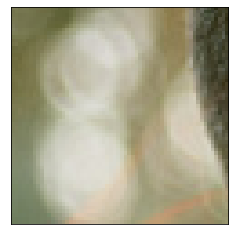

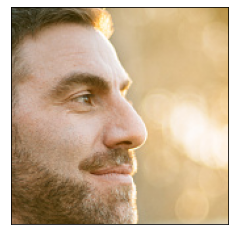

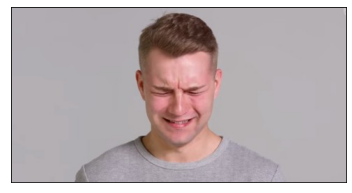

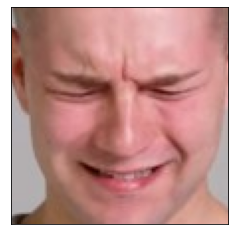

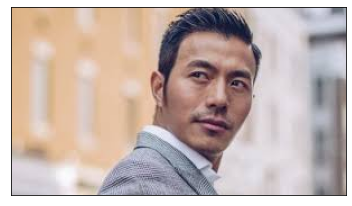

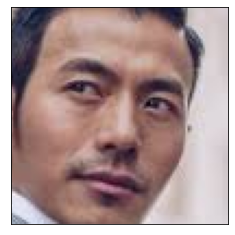

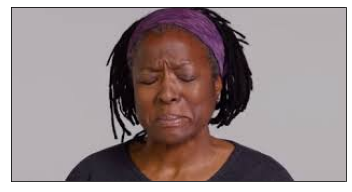

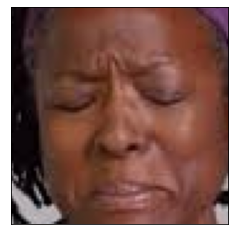

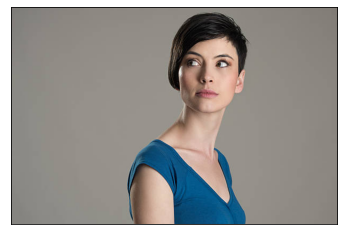

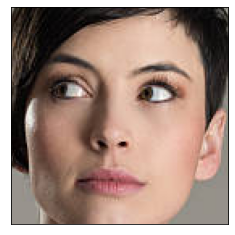

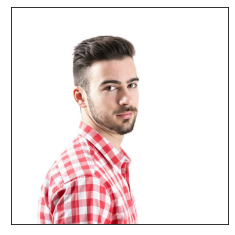

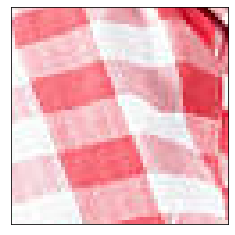

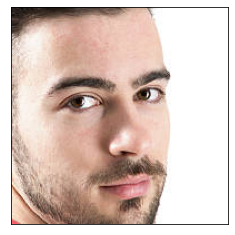

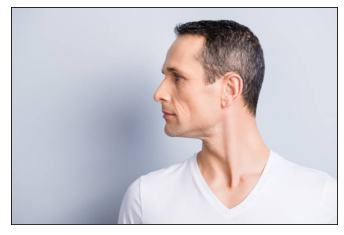

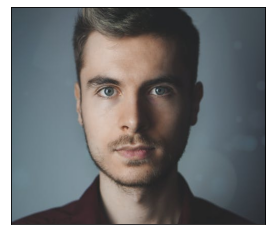

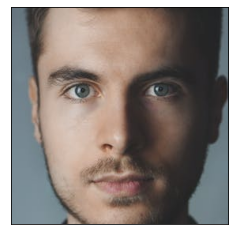

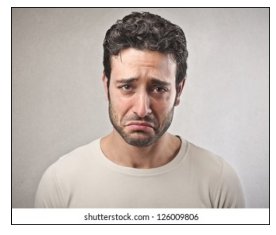

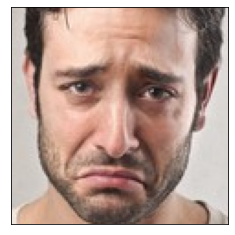

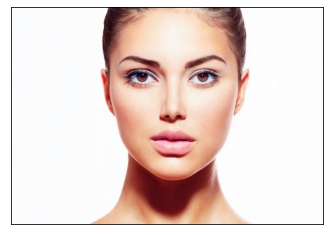

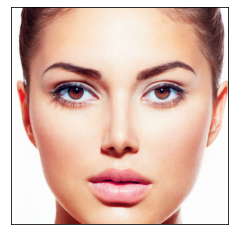

0.18704724311828613


In [41]:
#haar cascade: fast but cannot detect alot, outdated
# 0.3 - 0.6 seconds
faceDetector = cv2.CascadeClassifier('1. Models/haarcascade_frontalface_default.xml')
total = 0

for filename in os.listdir(img_folder):
    start = time.time()
    path = os.path.join(img_folder, filename)
    img_gray = cv2.imread(path,0)
    img_bgr = cv2.imread(path,1)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    show(img_rgb)

    faces = faceDetector.detectMultiScale(img_gray, 1.1, 4)
    
    try:
        for (x, y, w, h) in faces:
            face_rgb = img_rgb[y:y+h,x:x+w]
            show(face_rgb)
            
    except cv2.error as e:
        print('[Unknown error] Invalid face!')
        
    end = time.time()
    total = total + (end-start)
#     print('Used time:',end-start)
print(total/10)

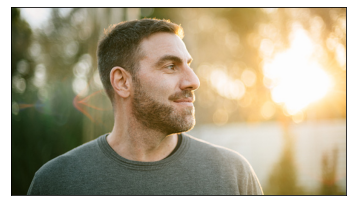

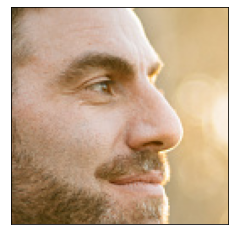

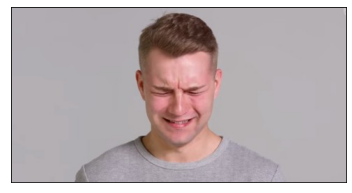

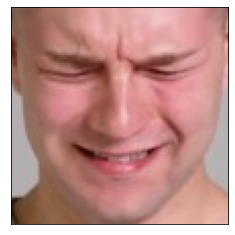

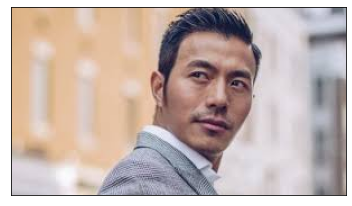

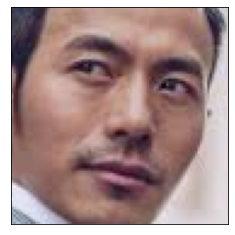

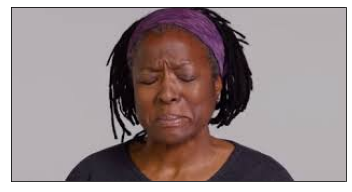

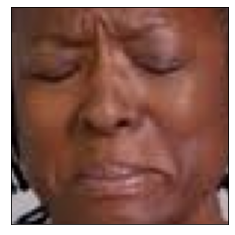

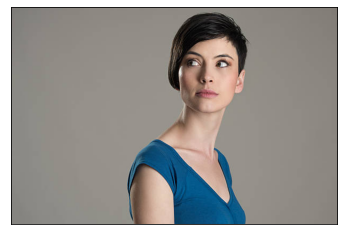

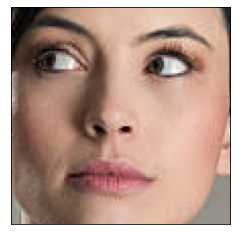

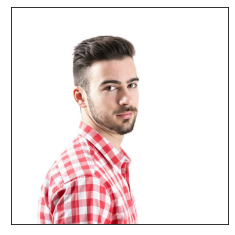

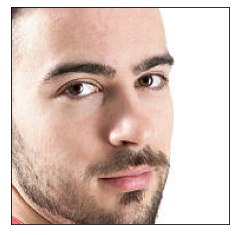

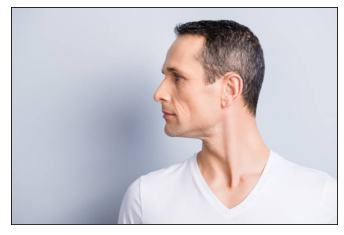

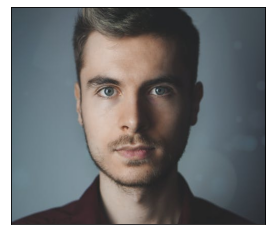

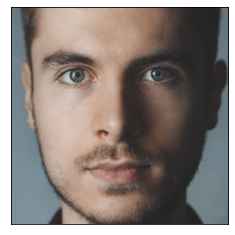

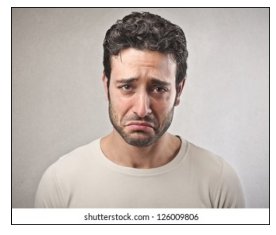

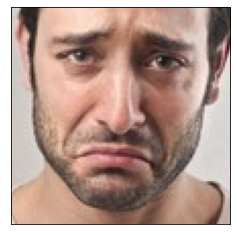

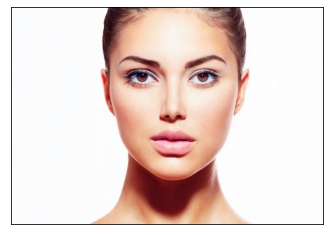

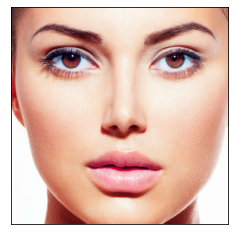

0.28322317600250246


In [32]:
#dlib: fast but cannot detect alot
# 0.6 - 1 seconds
hog_face_detector = dlib.get_frontal_face_detector()
total = 0

for filename in os.listdir(img_folder):
    start = time.time()
    path = os.path.join(img_folder, filename)
    img_bgr = cv2.imread(path,1)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    show(img_rgb)
#     plt.imshow(img_rgb)
#     plt.show()
    
    faceRects = hog_face_detector(img_rgb, 1)
    
    try:
        for faceRect in faceRects:
            x1 = faceRect.left()
            y1 = faceRect.top()
            x2 = faceRect.right()
            y2 = faceRect.bottom()
            face_rgb = img_rgb[y1:y2,x1:x2]
#             show(img_rgb)
            show(face_rgb)
#             print(len(face_rgb))
#             print(face_rgb)
#             if (len(face_rgb) > 0):
#             face_bgr = cv2.cvtColor(face_rgb, cv2.COLOR_RGB2BGR)
#                 plt.imshow(face_rgb)
#             cv2.imwrite(path2,face_bgr)# imwrite works in bgr
#                 plt.show()
            
    except cv2.error as e:
        print('[Unknown error] Invalid face!')
        
    end = time.time()
    total = total + (end-start)
#     print('Used time:',end-start)
print(total/10)

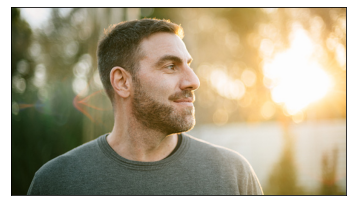

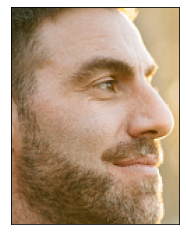

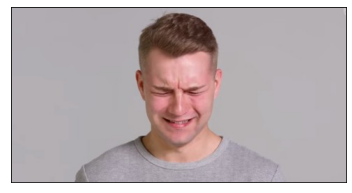

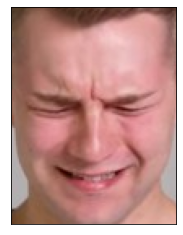

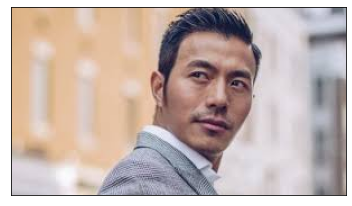

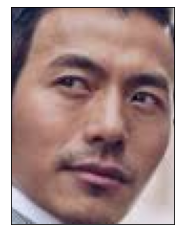

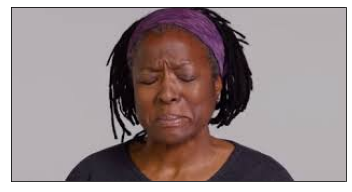

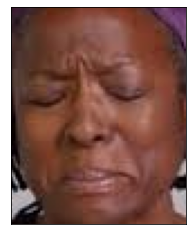

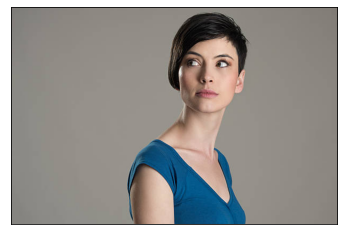

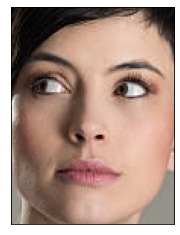

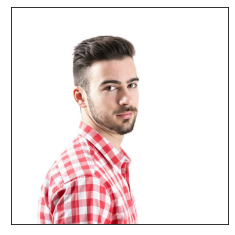

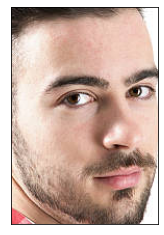

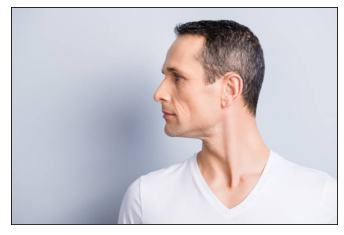

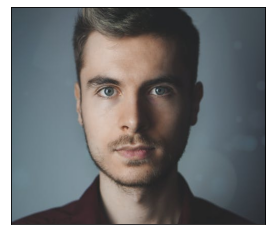

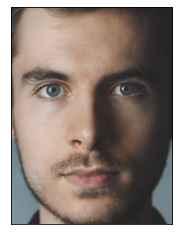

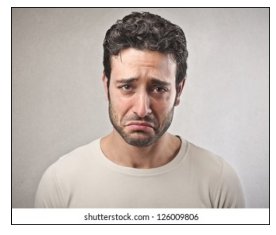

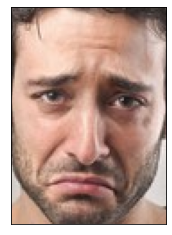

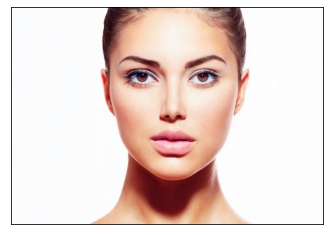

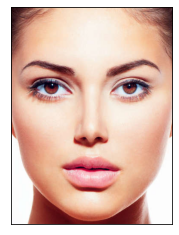

0.16059260368347167


In [29]:
#dnn
# 0.2 - 0.6 seconds
net = cv2.dnn.readNetFromCaffe("1. Models/deploy.prototxt.txt","1. Models/res10_300x300_ssd_iter_140000.caffemodel")
total = 0

for filename in os.listdir(img_folder):
    start = time.time()
    path = os.path.join(img_folder, filename)
#     path2 = os.path.join(os.path.join('test_detected', 'dnn'), filename)
    img_bgr = cv2.imread(path,1)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    show(img_rgb)
#     plt.imshow(img_rgb)
#     plt.show()
    
    h, w = img_rgb.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img_rgb, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
#     print(blob.shape)
    net.setInput(blob)
    faces = net.forward()
    
    try:
        for i in range(faces.shape[2]):
            confidence = faces[0, 0, i, 2]
            if confidence > 0.99:
                box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
                (x1, y1, x2, y2) = box.astype("int")
                face_rgb = img_rgb[y1:y2,x1:x2]
                if (len(face_rgb) > 0):
                    show(face_rgb)
            
    except cv2.error as e:
        print('[Unknown error] Invalid face!')
        
    end = time.time()
    total = total + (end-start)
#     print('Used time:',end-start)
print(total/10)

# Try videos

In [5]:
def getVideoPaths(employeeList):
    videos_base_dir = 'Devices'
    videoPaths = []
    
    for id in employeeList:
        
        path = os.path.join(videos_base_dir, id)
        
        if len(os.listdir(path)) == 0:
            print('No videos found. Please insert video into',path)
        else:
            videoPath = os.path.join(path, os.listdir(path)[0])
            videoPaths.append(videoPath)
    return videoPaths

def extractFrames(path):
    video = cv2.VideoCapture(path)
    
    frameRate = video.get(5) #frame rate
    extractedFrames = []

    while(video.isOpened()):
        frameId = video.get(1) #current frame number
        ret, frame = video.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0): #every second save the first frame
            grayImage = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            extractedFrames.append(grayImage)

    video.release()

    return extractedFrames

def extractFrames_rgb(path):
    video = cv2.VideoCapture(path)
    
    frameRate = video.get(5) #frame rate
    extractedFrames = []

    while(video.isOpened()):
        frameId = video.get(1) #current frame number
        ret, frame = video.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0): #every second save the first frame
            rgbImage = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            extractedFrames.append(rgbImage)

    video.release()

    return extractedFrames

def show(img, titlestr=""):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray') #if not specified, it will treat this image as heat map
    else:
        plt.imshow(img)
    plt.xticks([]), plt.yticks([])  
    plt.title(titlestr)
    plt.show() 
    
def getCroppedFaceRegions_haar(frames,faceDetector):
    cropped = []
    
    for frame in frames:
        # Detect faces
        face = faceDetector.detectMultiScale(frame, 1.1, 4)

        # Extrct face region
        for (x, y, w, h) in face:
            croppedImage = frame[y:y+h,x:x+w]
        
#         To be commented
        show(frame)
        show(croppedImage)
    
        cropped.append(cv2.resize(croppedImage,(48,48)))
        
    return cropped

def getCroppedFaceRegions_dlib(frames,faceDetector):
    cropped = []
    
    for frame in frames:
        # Detect faces
        faceRects = faceDetector(frame, 1)
    
        try:
            for faceRect in faceRects:
                x1 = faceRect.left()
                y1 = faceRect.top()
                x2 = faceRect.right()
                y2 = faceRect.bottom()
                face_rgb = frame[y1:y2,x1:x2]
                show(frame)
                show(face_rgb)
                cropped.append(cv2.resize(face_rgb,(48,48)))

        except cv2.error as e:
            print('[Unknown error] Invalid face!')
        
    return cropped

def getCroppedFaceRegions_opencv(frames,faceDetector):
    cropped = []
    
    for frame in frames:
        # Detect faces
        h, w = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
#         print(blob.shape)
        faceDetector.setInput(blob)
        faces = faceDetector.forward()

        try:
            for i in range(faces.shape[2]):
                confidence = faces[0, 0, i, 2]
                if confidence > 0.5:
#                     print(confidence)
                    box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (x1, y1, x2, y2) = box.astype("int")
#                     print(x1, y1, x2, y2)
                    face_rgb = frame[y1:y2,x1:x2]
                    show(frame)
                    show(face_rgb)
                    cropped.append(cv2.resize(face_rgb,(48,48)))

        except cv2.error as e:
            print('[Unknown error] Invalid face!')
        
    return cropped

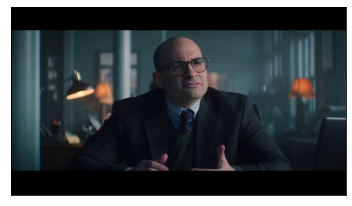

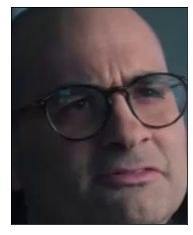

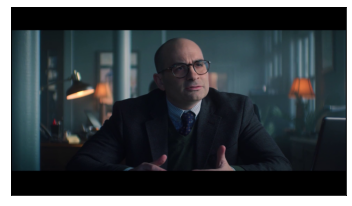

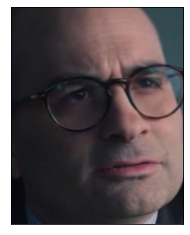

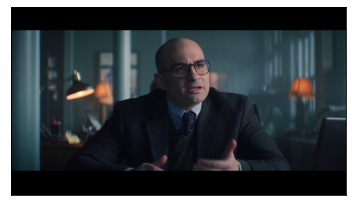

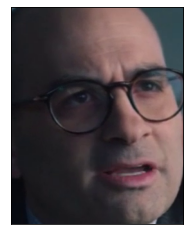

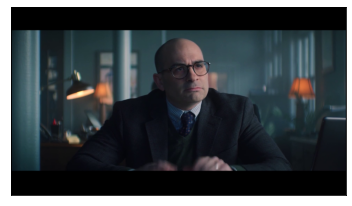

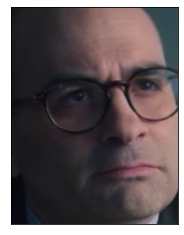

In [11]:
videoPathList = getVideoPaths(['E0002'])
for i,videoPath in enumerate(videoPathList):
#     frames = extractFrames(videoPath)
    frames_rgb = extractFrames_rgb(videoPath)
#     cropped = getCroppedFaceRegions_haar(frames,cv2.CascadeClassifier('1. Models/haarcascade_frontalface_default.xml'))
#     cropped = getCroppedFaceRegions_dlib(frames_rgb,dlib.get_frontal_face_detector())
    cropped = getCroppedFaceRegions_opencv(frames_rgb,cv2.dnn.readNetFromCaffe("1. Models/deploy.prototxt.txt","1. Models/res10_300x300_ssd_iter_140000.caffemodel"))
